## Data Link

https://www.kaggle.com/datasets/ninzaami/loan-predication/data`

## Importing Libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

## Reading the data

In [4]:
data = pd.read_csv('loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print(data.shape)

(614, 13)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


***Observations***

- The dataset contains 614 entries, but some columns have missing values, such as "LoanAmount" and "Credit_History."
- ApplicantIncome and CoapplicantIncome exhibit high variability, with some applicants having relatively low incomes and others with high incomes.
- The credit history of the applicants is generally positive, as indicated by the high mean and the 75th percentile having a credit history value of 1.

In [8]:
# Checking the null values

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

***Observations***

1. The columns "Gender" and "Married" have 13 and 3 missing values, respectively.
   - Implication: Missing values in these columns may impact analyses related to gender-specific or marital status-specific trends.


2. Columns "Dependents," "Self_Employed," and "LoanAmount" have 15, 32, and 22 missing values, respectively.
    - Implication: Missing values in these columns might affect the analyses of loan prediction.


3. Columns "Loan_Amount_Term" and "Credit_History" have 14 and 50 missing values, respectively.
     - Implication: Missing values in these columns may impact analyses related to loan term durations and credit history. Understanding the distribution of loan terms and credit history is crucial for drawing meaningful insights.


4. Some columns, such as "Education," "ApplicantIncome," "CoapplicantIncome," "Property_Area," and "Loan_Status," have no missing values.
      - Implication: These columns provide complete information and can be used confidently in analyses. The absence of missing values in the target variable ("Loan_Status") is particularly important for model training and evaluation.


5. The "Credit_History" column has a relatively high number of missing values (50).
      - Implication: Given that credit history is often a critical factor in loan-related analyses, addressing missing values in this column is essential. Imputation or a careful assessment of the impact on the analysis is needed.

## Data Preprocessing

### Drop Irrelevant Columns

In [9]:
# Dropping the unnecessay columns

data.drop(["Loan_ID","Dependents"], axis=1, inplace= True)

In [10]:
# Verfying the column after dropping

data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Treatment of Null values (Categorical Values)

In [11]:
# Treating null values in categorical columns like Gender, Married and Self_Employed

cols = data[["Gender","Married","Self_Employed"]]

for i in cols:
    data[i].fillna(data[i].mode().iloc[0],inplace= True)

In [12]:
# Verifying the treated columns

data.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Treatment of Null values (Numerical Values)

In [13]:

# Treating null values in column like LoanAmount, Loan_Amount_Term, Credit_History

cols = data[["LoanAmount","Loan_Amount_Term","Credit_History"]]

for i in cols:
    data[i].fillna(data[i].mean(axis=0),inplace=True)

In [14]:
# Checking the null values

data.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

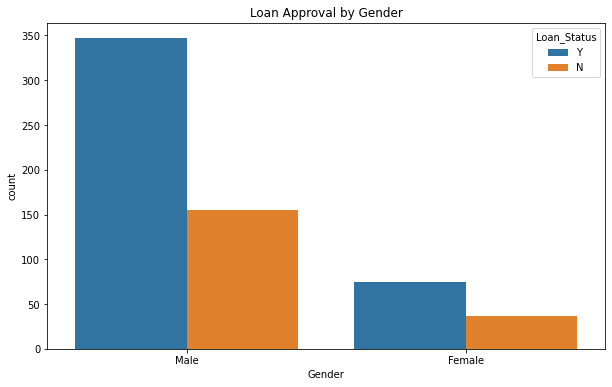

In [15]:
# Countplot of Gender

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data, hue='Loan_Status')
plt.title('Loan Approval by Gender')
plt.show()

***Observations***

- The majority of loan applicants are male.
- The approval rate for loans is slightly higher for males than females.

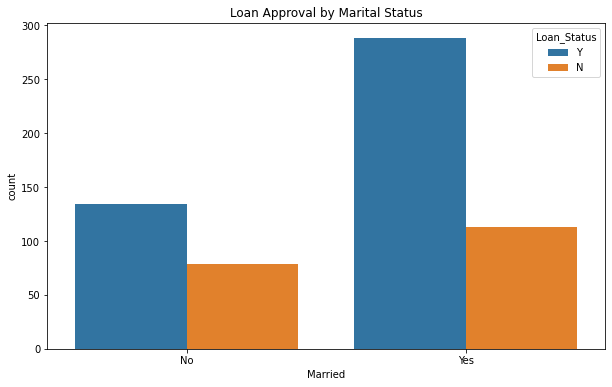

In [16]:
# Countplot of Married

plt.figure(figsize=(10, 6))
sns.countplot(x='Married', data=data, hue='Loan_Status')
plt.title('Loan Approval by Marital Status')
plt.show()

***Observations***

- A significant number of applicants are married.
- Married individuals have a higher loan approval rate compared to unmarried individuals.

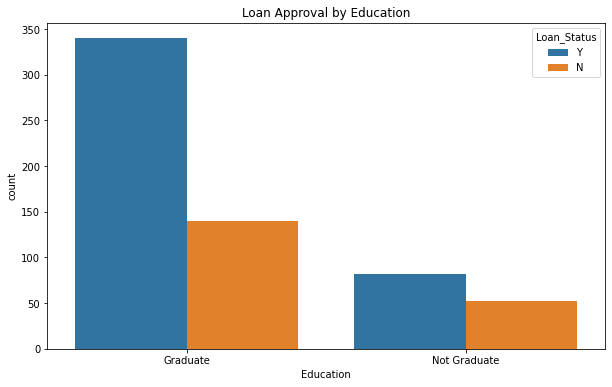

In [17]:
# Countplot of Education

plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=data, hue='Loan_Status')
plt.title('Loan Approval by Education')
plt.show()

***Observations***

- Most applicants are graduates.
- Graduates tend to have a slightly higher loan approval rate compared to non-graduates.

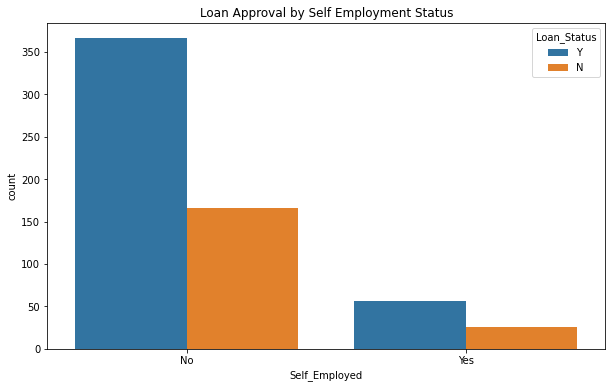

In [18]:
# Countplot of Self_Employed

plt.figure(figsize=(10, 6))
sns.countplot(x='Self_Employed', data=data, hue='Loan_Status')
plt.title('Loan Approval by Self Employment Status')
plt.show()

***Observations***

- A small proportion of applicants are self-employed.
- Self-employed individuals have a similar loan approval rate compared to non-self-employed.

### Bivariate Analysis

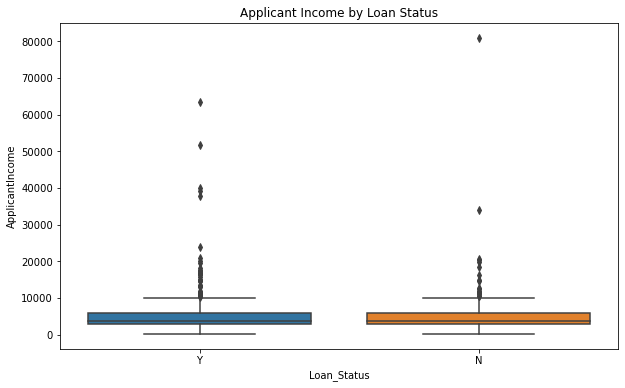

In [19]:
# Boxplot of ApplicantIncome by Loan_Status

plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data)
plt.title('Applicant Income by Loan Status')
plt.show()

***Observations***

- The distribution of applicant income varies between approved and rejected loans.
- Applicants with higher incomes may have a better chance of loan approval.

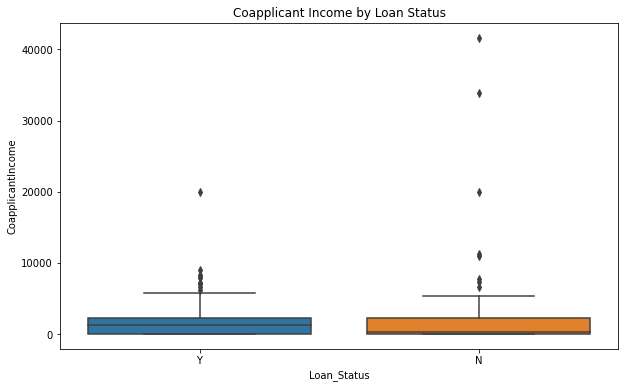

In [20]:
# Boxplot of CoapplicantIncome by Loan_Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=data)
plt.title('Coapplicant Income by Loan Status')
plt.show()

***Observation***

- Coapplicant income is generally lower for rejected loans compared to approved loans.

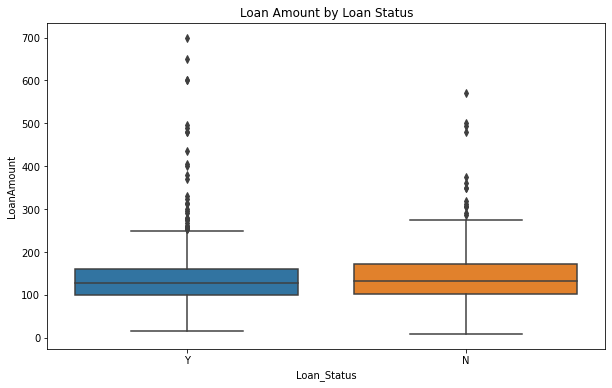

In [21]:
# Boxplot of LoanAmount by Loan_Status

plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=data)
plt.title('Loan Amount by Loan Status')
plt.show()

***Observations***

- The distribution of loan amounts differs for approved and rejected loans.
- Approved loans tend to have higher loan amounts on average.

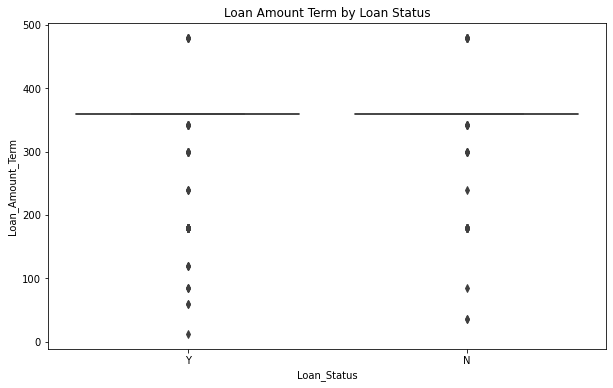

In [22]:
# Boxplot of Loan_Amount_Term by Loan_Status

plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=data)
plt.title('Loan Amount Term by Loan Status')
plt.show()

***Observations***

- The loan amount term varies for approved and rejected loans.
- Shorter loan terms are more common for approved loans.

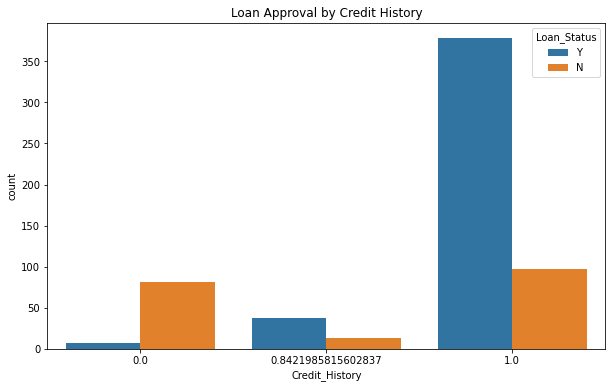

In [23]:
# Countplot of Credit_History

plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_History', data=data, hue='Loan_Status')
plt.title('Loan Approval by Credit History')
plt.show()

***Observations***

- Applicants with a credit history of 1 have a significantly higher chance of loan approval.
- A credit history of 0 is associated with a higher rejection rate.

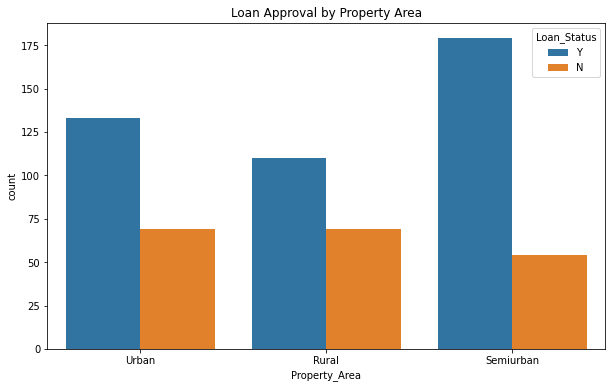

In [24]:
# Countplot of Property_Area
plt.figure(figsize=(10, 6))
sns.countplot(x='Property_Area', data=data, hue='Loan_Status')
plt.title('Loan Approval by Property Area')
plt.show()

***Observation***

- Applicants from Semiurban areas have a higher chance of loan approval.
- Rural areas have a lower loan approval rate compared to Urban and Semiurban areas.

### Multivariate Analysis

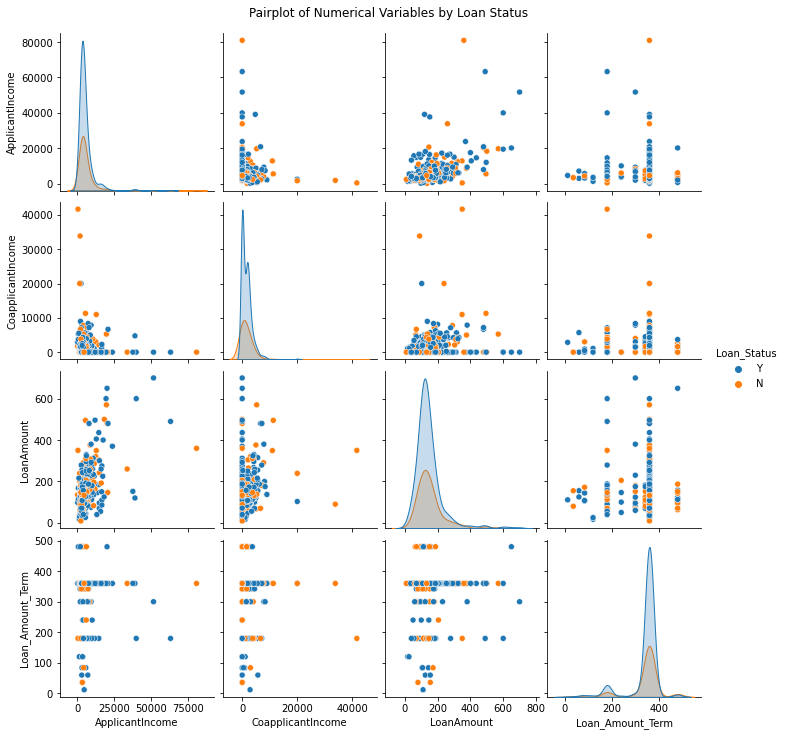

In [25]:
# Pairplot of numerical variables colored by Loan_Status
num_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
sns.pairplot(data, hue='Loan_Status', vars=num_vars)
plt.suptitle('Pairplot of Numerical Variables by Loan Status', y=1.02)
plt.show()

***Observations***

- No strong linear correlations are observed among numerical variables.
- Some variables, like ApplicantIncome and CoapplicantIncome, exhibit positive skewness.

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Variables')

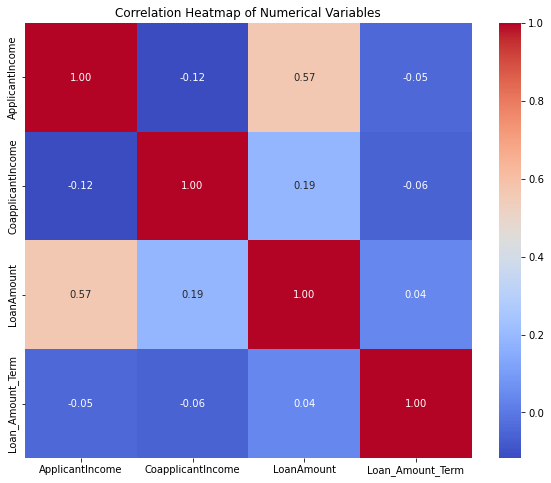

In [26]:
# Correlation heatmap of numerical variables

plt.figure(figsize=(10, 8))
correlation_matrix = data[num_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')


***Observations***

Weak correlations are observed among numerical variables, indicating no strong linear relationships.

## EDA Conclusion: Understanding Loan Approval Dynamics

**Overall Insights:**


***Demographic Distribution:***

- The dataset is predominantly composed of male, married, and graduate applicants.
Most applicants are not self-employed.


***Loan Approval Dynamics:***

- Married individuals and graduates tend to have a higher loan approval rate.
- Gender and self-employment status have a moderate influence on loan approval.
- Education level is associated with varying loan approval rates.


***Financial Factors:***

- Applicant income significantly influences loan approval.
- Coapplicant income is lower for rejected loans, suggesting joint financial strength matters.
- Higher loan amounts are approved, with shorter loan terms being more common.


***Credit History Impact:***

- A positive credit history is a crucial factor; applicants with a credit history of 1 have a significantly higher approval rate.
- A credit history of 0 is associated with a higher rejection rate.


***Property Area Influence:***

- Applicants from Semiurban areas have a higher chance of loan approval.
- Rural areas exhibit a lower loan approval rate compared to Urban and Semiurban areas.


***Numerical Variables and Correlations:***

- No strong linear correlations are observed among numerical variables.
- Understanding non-linear relationships and interactions could enhance predictive modeling.

## Encoding the Categorical Data

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
# Convert categorical variables to numerical using Label Encoding

label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

    
# Separate features and target variable

X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Development

### Gaussian Naive Bayes

In [29]:
# Create and train Gaussian Naive Bayes model

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predictions
gnb_predictions = gnb.predict(X_test)

# Evaluate the model

print("Gaussian Naive Bayes Model:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:\n", classification_report(y_test, gnb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, gnb_predictions))


Gaussian Naive Bayes Model:
Accuracy: 0.7804878048780488
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Confusion Matrix:
 [[18 25]
 [ 2 78]]


### Support Vector Classifier (SVC)

In [30]:
# Create and train Support Vector Classifier (SVC) model

svc = SVC()
svc.fit(X_train, y_train)

# Predictions

svc_predictions = svc.predict(X_test)

# Evaluate the model

print("Support Vector Classifier (SVC) Model:")
print("Accuracy:", accuracy_score(y_test, svc_predictions))
print("Classification Report:\n", classification_report(y_test, svc_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_predictions))

Support Vector Classifier (SVC) Model:
Accuracy: 0.7804878048780488
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Confusion Matrix:
 [[18 25]
 [ 2 78]]


### XGBoost Classifier with GridSearchCV

In [31]:
# Create and train Decision Tree Classifier model

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predictions

dt_predictions = dt_classifier.predict(X_test)

# Evaluate the model

print("Decision Tree Classifier Model:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))

Decision Tree Classifier Model:
Accuracy: 0.6991869918699187
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.51      0.54        43
           1       0.75      0.80      0.78        80

    accuracy                           0.70       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.69      0.70      0.69       123

Confusion Matrix:
 [[22 21]
 [16 64]]


In [49]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

# Encoding the categorical columns

data[["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"]] = ord_enc.fit_transform(data[["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"]])

data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [50]:
# Converting the encoded values to integers

data[["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"]] = data[["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"]].astype(int)

In [51]:
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


### Model Development

**1. Dividing the data**

In [52]:
from sklearn.model_selection import train_test_split

X = data.drop ("Loan_Status", axis=1)
y = data["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 10)
(491,)
(123, 10)
(123,)


**2. Using GaussianNB**

In [53]:
from sklearn.naive_bayes import GaussianNB

gfc = GaussianNB()
gfc.fit(X_train, y_train)
pred1 = gfc.predict(X_test)

In [54]:
from sklearn.metrics import precision_score, recall_score, accuracy_score


#defining the function to check the different scores

def loss(y_true, y_pred):
    pre = precision_score(y_true, y_pred) 
    rec = recall_score(y_true, y_pred) 
    acc = accuracy_score(y_true, y_pred) 
    
    
    print(pre)
    print(rec)
    print(acc)

In [55]:
# Checking precision_score, recall_score, accuracy_score

loss(y_test, pred1)

0.7766990291262136
0.9523809523809523
0.7804878048780488


### Using SVC with Grid Search CV

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



# defining paramter range

param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.0001],
              'kernel':['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit =True, verbose =3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [57]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [58]:
svc = SVC(C=0.1, gamma=1, kernel='rbf')
svc.fit(X_train, y_train)
pred2 = svc.predict(X_test)
loss(y_test, pred2)

0.6829268292682927
1.0
0.6829268292682927


### Using XGBoost Classifier

In [64]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb.fit(X_train, y_train) 
pred3 = xgb.predict(X_test) 
loss(y_test, pred3)

0.7888888888888889
0.8452380952380952
0.7398373983739838


### Using Decision Tree Using Randomized Search

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    
    # Extract best score
    best_score = rand_clf.best_score_

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

In [66]:
randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.819
Test score: 0.772


DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')

In [67]:
ds = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random') 
ds.fit(X_train, y_train) 
pred4 =ds.predict(X_test) 
loss(y_test, pred4)

0.7592592592592593
0.9761904761904762
0.7723577235772358


In [68]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2)) 

Training score: 0.819
Test score: 0.772


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [69]:
import joblib 
joblib.dump(ds, "model.pkl") 
model = joblib.load('model.pkl' ) 
model.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])